# Definition

In statistical modeling, regression analysis is a statistical method for estimating the **relationship between a dependent variable and one or more independent variables**

# Architecture of a Regression model 

|s.no| Hyperperamater | Type of Values | Example |
|----|----------------|----------------|---------|
|**1.**|**Input Layer Shape**|Same shape as number of features|3 for bedroom,bathroom,car Space|
|**2.**|**Hidden Layer**|Problen Specific|fully connected (dense) layers|
|**3.**|**Neurons per hidden layer**|Problen Specific|generally 1 to 100|
|**4.**|**Output Layer**|Same shape as desired prediction shape|1 house prize|
|**5.**|**Hidden Activation**|rectified Linear units|Linear, Sigmoid, ReLU, Leaky ReLU, Tanh|
|**6.**|**Output Activation**||ReLU,Leaky ReLU, Tanh|
|**7.**|**Loss function**|difference between actual and predicted value|MSE, MAE, Huber Loss, Hinge Loss|
|**8.**|**Optimizers**|algorithms used to adjusting the model's parameters|Stochastic Gradient Descent,Adam | 

```python
# 1. Create the Model (Specified to your Problem)
model=tf.keras.Sequential([
    tf.keras.Input(shape=(3,)), # defining the input layer
    
    tf.keras.layers.Dense(100,activation="relu"),# Defining the hidden layers with the number of neurons and activation function
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    
    tf.keras.layers.Dense(1,activation=None), # defining the output layer
])


# 2. Compile the Model
model.compile(loss=tf.keras.losses.mae, # defining the lass function
             optimizer=tf.keas.optimizers.Adam(lr=0.0001), #defining the optimizer
             metrics=["mae"])

# 3. Fit the Model
model.fit(X_train,Y_train,epochs=100) #training the model with epoches or loops
```

# steps of modeling

1. **Get Data Ready**  
↓  
2. **Bilding or picking a pretrained model**  
↓  
3. **Fit the model to data and make predictions**  
↓  
4. **Evaluate the model by test data**  
↓  
5. **Improve through experimentation**  
↓  
6. **Save or Reload your save model**

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.18.1


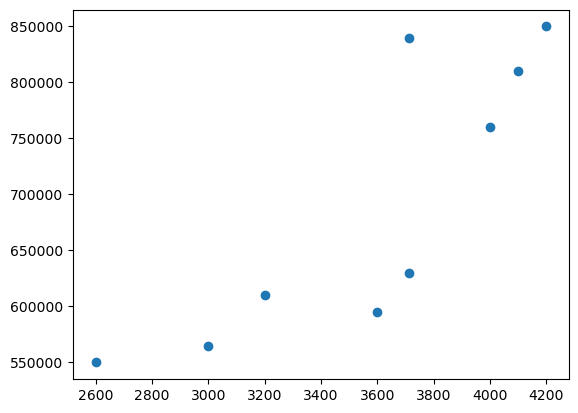

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("homeprices.csv",usecols=["area","price"])
data.loc[data["price"]<500000,"price"]=int(data["price"].mean())
data.loc[data["area"]>4250,"area"]=int(data["area"].mean())

x=data["area"]
y=data["price"]
plt.scatter(x,y) 

In [3]:
x[0].shape,x[0].ndim #scaler's

((), 0)

## converting numpy to pandas

In [4]:
x=tf.constant(x,dtype=tf.float32)
y=tf.constant(y,dtype=tf.float32)
x,y

(<tf.Tensor: shape=(9,), dtype=float32, numpy=
 array([2600., 3000., 3200., 3600., 4000., 4100., 4200., 3711., 3711.],
       dtype=float32)>,
 <tf.Tensor: shape=(9,), dtype=float32, numpy=
 array([550000., 565000., 610000., 595000., 760000., 810000., 850000.,
        840000., 630000.], dtype=float32)>)

## Method 1

In [5]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model useing Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss="mae",
             optimizer="SGD",
             metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - loss: 684964.3750 - mae: 684964.3750
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 557578.8750 - mae: 557578.8750
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 430193.3125 - mae: 430193.3125
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 302807.7500 - mae: 302807.7500
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 175422.1875 - mae: 175422.1875


## Method 2

In [6]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model useing Sequential API
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model2.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# Fit the model
model2.fit(tf.expand_dims(x,axis=-1),y,epochs=5) #expand the dim of x as the traning can't be of 0 rank of tensor

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - loss: 695089.3750 - mae: 695089.3750
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 567703.8750 - mae: 567703.8750
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 440318.3438 - mae: 440318.3438
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 312932.8125 - mae: 312932.8125
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 185547.2500 - mae: 185547.2500


In [7]:
x,y

(<tf.Tensor: shape=(9,), dtype=float32, numpy=
 array([2600., 3000., 3200., 3600., 4000., 4100., 4200., 3711., 3711.],
       dtype=float32)>,
 <tf.Tensor: shape=(9,), dtype=float32, numpy=
 array([550000., 565000., 610000., 595000., 760000., 810000., 850000.,
        840000., 630000.], dtype=float32)>)

In [8]:
test = tf.expand_dims(tf.constant(2600.0),axis=-1) #prediction input should be equale to the training input
test
model2.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[460276.94]], dtype=float32)

# Improving our model    

**Creating a model** - 
  * eather by adding more layers  
  * increasing the number of hidden units  
  * change the activation function of each layer
  
**Compiling the model**-  
  * we can change the optimization function/ learning rate
  
**Fitting a model**-  
  * increase the epochs

## increasing the epochs

In [9]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model useing Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - loss: 687911.3750 - mae: 687911.3750
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 560525.8125 - mae: 560525.8125
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 433140.2500 - mae: 433140.2500
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 305754.7188 - mae: 305754.7188
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 178369.1719 - mae: 178369.1719
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 69642.9688 - mae: 69642.9688
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 52576.1992 - mae: 52576.1992
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 55815.7969 - mae: 55815.7969
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 64347.5625 - mae: 64347.5625
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 60136.8047 - mae: 60136.8047
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 59532.7305 - mae: 59532.7305
Epoch 12/100
1/1 ━━━━━━━━━━━━━

In [10]:
x,y

(<tf.Tensor: shape=(9,), dtype=float32, numpy=
 array([2600., 3000., 3200., 3600., 4000., 4100., 4200., 3711., 3711.],
       dtype=float32)>,
 <tf.Tensor: shape=(9,), dtype=float32, numpy=
 array([550000., 565000., 610000., 595000., 760000., 810000., 850000.,
        840000., 630000.], dtype=float32)>)

In [11]:
test = tf.expand_dims(tf.constant(2600.0),axis=-1) #prediction input should be equale to the training input
test
model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[521838.9]], dtype=float32)

## changing the optimizer

In [12]:
# nochange

# set random seed
tf.random.set_seed(42)

# 1. Create a model useing Sequential API
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model3.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# Fit the model
h=model3.fit(tf.expand_dims(x,axis=-1),y,epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - loss: 684898.4375 - mae: 684898.4375
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 557512.8750 - mae: 557512.8750
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 430127.3750 - mae: 430127.3750
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 302741.8125 - mae: 302741.8125
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 175356.2500 - mae: 175356.2500
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 68001.5000 - mae: 68001.5000
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 53617.3359 - mae: 53617.3359
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 54174.3398 - mae: 54174.3398
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 66176.6094 - mae: 66176.6094
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 58495.3398 - mae: 58495.3398


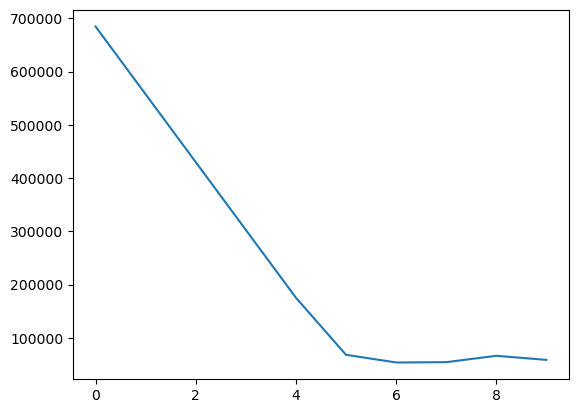

In [13]:
plt.plot(h.history["mae"])

## add Hidden layer

In [14]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model useing Sequential API
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model4.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# Fit the model
h=model4.fit(tf.expand_dims(x,axis=-1),y,epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step - loss: 691255.6250 - mae: 691255.6250
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 259072.4688 - mae: 259072.4688
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 599544896.0000 - mae: 599544896.0000
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 690000.0000 - mae: 690000.0000
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 690000.0000 - mae: 690000.0000
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 690000.0000 - mae: 690000.0000
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 689999.9375 - mae: 689999.9375
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 689999.9375 - mae: 689999.9375
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 689999.9375 - mae: 689999.9375
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 689999.9375 - mae: 689999.9375
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 689999.9375 - mae: 689999.9375
Epoch 12/20
1/1 ━━━━━━━

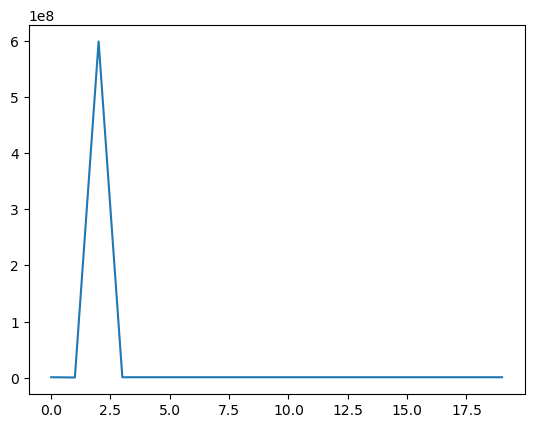

In [15]:
plt.plot(h.history["mae"])

In [16]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model useing Sequential API
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model4.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# Fit the model
h=model4.fit(tf.expand_dims(x,axis=-1),y,epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step - loss: 689022.6250 - mae: 689022.6250
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 19091680.0000 - mae: 19091680.0000
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 690000.7500 - mae: 690000.7500
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 690000.0000 - mae: 690000.0000
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 690000.0000 - mae: 690000.0000
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 690000.0000 - mae: 690000.0000
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 689999.9375 - mae: 689999.9375
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 689999.9375 - mae: 689999.9375
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 689999.9375 - mae: 689999.9375
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 689999.9375 - mae: 689999.9375
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 689999.9375 - mae: 689999.9375
Epoch 12/20
1/1 ━━━━━━━━━

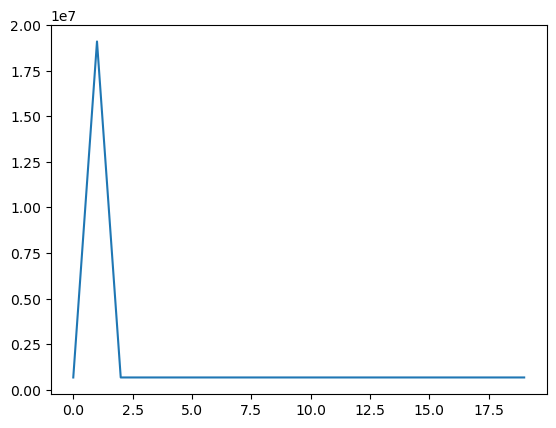

In [17]:
plt.plot(h.history["mae"])

In [18]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model useing Sequential API
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="linear")
])

# Compile the model
model4.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# Fit the model
h=model4.fit(tf.expand_dims(x,axis=-1),y,epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step - loss: 689164.5625 - mae: 689164.5625
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 19450806.0000 - mae: 19450806.0000
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 690000.0000 - mae: 690000.0000
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 690000.0000 - mae: 690000.0000
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 690000.0000 - mae: 690000.0000
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 690000.0000 - mae: 690000.0000
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 689999.9375 - mae: 689999.9375
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 689999.9375 - mae: 689999.9375
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 689999.9375 - mae: 689999.9375
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 689999.9375 - mae: 689999.9375
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 689999.9375 - mae: 689999.9375
Epoch 12/20
1/1 ━━━━━━━━━

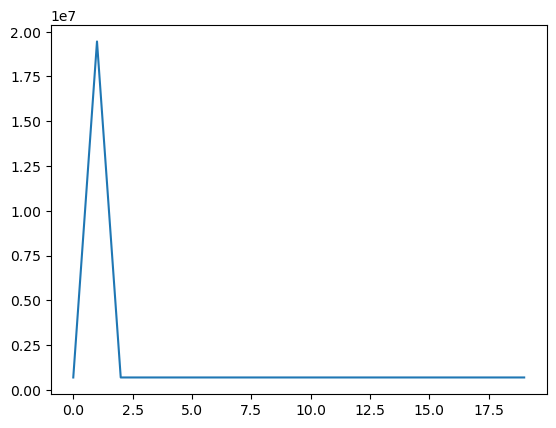

In [19]:
plt.plot(h.history["mae"])

In [20]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model useing Sequential API
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="linear")
])

# Compile the model
model4.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
             metrics=["mae"])

# Fit the model
h=model4.fit(tf.expand_dims(x,axis=-1),y,epochs=70)

Epoch 1/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 689661.3750 - mae: 689661.3750
Epoch 2/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 688964.0000 - mae: 688964.0000
Epoch 3/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 688259.2500 - mae: 688259.2500
Epoch 4/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 687550.4375 - mae: 687550.4375
Epoch 5/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 686827.7500 - mae: 686827.7500
Epoch 6/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 686058.8750 - mae: 686058.8750
Epoch 7/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 685231.9375 - mae: 685231.9375
Epoch 8/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 684347.8125 - mae: 684347.8125
Epoch 9/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 683379.3125 - mae: 683379.3125
Epoch 10/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 682318.9375 - mae: 682318.9375
Epoch 11/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 681158.7500 - mae: 681158.7500
Epoch 12/70
1/1 ━━━━━━━━━━━━━━━━

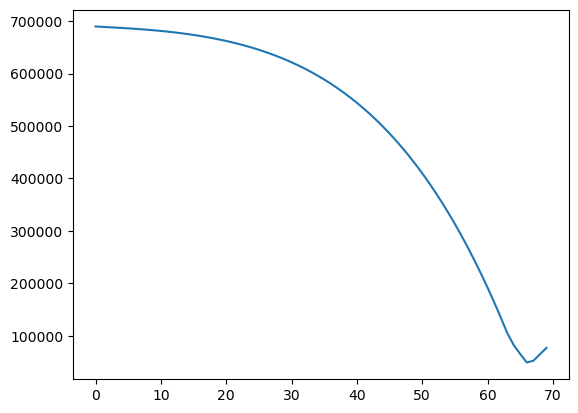

In [21]:
plt.plot(h.history["mae"])

In [22]:
x,y

(<tf.Tensor: shape=(9,), dtype=float32, numpy=
 array([2600., 3000., 3200., 3600., 4000., 4100., 4200., 3711., 3711.],
       dtype=float32)>,
 <tf.Tensor: shape=(9,), dtype=float32, numpy=
 array([550000., 565000., 610000., 595000., 760000., 810000., 850000.,
        840000., 630000.], dtype=float32)>)

In [23]:
test = tf.expand_dims(tf.constant(2600.0),axis=-1) #prediction input should be equale to the training input
test
model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[521838.9]], dtype=float32)

# Evaluating a model

* visualize **The Data**
* visualize **The Model itself**
* visualize **The Traning of the model**
* visualize **The prediction of the model**

In [24]:
x=tf.range(-100,200,4)
x

<tf.Tensor: shape=(75,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96,  100,  104,  108,  112,  116,
        120,  124,  128,  132,  136,  140,  144,  148,  152,  156,  160,
        164,  168,  172,  176,  180,  184,  188,  192,  196])>

In [25]:
y=(x+10)*2
y

<tf.Tensor: shape=(75,), dtype=int32, numpy=
array([-180, -172, -164, -156, -148, -140, -132, -124, -116, -108, -100,
        -92,  -84,  -76,  -68,  -60,  -52,  -44,  -36,  -28,  -20,  -12,
         -4,    4,   12,   20,   28,   36,   44,   52,   60,   68,   76,
         84,   92,  100,  108,  116,  124,  132,  140,  148,  156,  164,
        172,  180,  188,  196,  204,  212,  220,  228,  236,  244,  252,
        260,  268,  276,  284,  292,  300,  308,  316,  324,  332,  340,
        348,  356,  364,  372,  380,  388,  396,  404,  412])>

## visualize the data

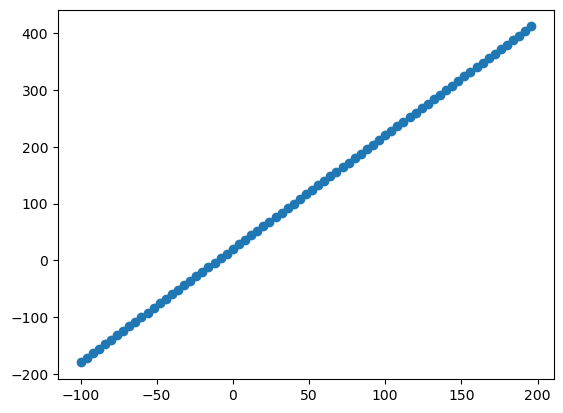

In [26]:
plt.scatter(x,y)

In [27]:
len(x)*0.2

15.0

In [28]:
# split x and y into  traning and testing data
xtrain=x[:60]
xtest=x[60:]
ytrain=y[:60]
ytest=y[60:]

len(xtrain),len(xtest),len(ytrain),len(ytest)

(60, 15, 60, 15)

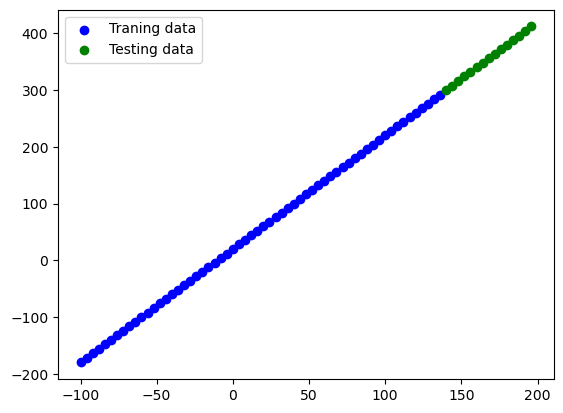

In [29]:
plt.scatter(xtrain,ytrain,c="b",label="Traning data")
plt.scatter(xtest,ytest,c="g",label="Testing data")
plt.legend()

In [81]:
# Recreating the model

# 1. define a model
model=tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(100,activation="linear"),
    tf.keras.layers.Dense(1,activation="linear")
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["mae"])

## Visualize the model

In [82]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# 3.fit the model
model.fit(tf.expand_dims(xtrain,axis=-1),ytrain,epochs=200)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 116.5615 - mae: 116.5615
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 113.6015 - mae: 113.6015
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 110.6381 - mae: 110.6381
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 107.6675 - mae: 107.6675
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 104.6901 - mae: 104.6901
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 101.7218 - mae: 101.7218
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 98.7434 - mae: 98.7434
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 95.7536 - mae: 95.7536
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 92.7507 - mae: 92.7507
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 89.7333 - mae: 89.7333
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 86.6998 - mae: 86.6998
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 83.6485 - mae: 83.6485
Epoch 13/200


In [84]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

## visualizeing the model's prediction

In [85]:
ypred = model.predict(xtest)
ypred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[301.70663],
       [310.06268],
       [318.41876],
       [326.77478],
       [335.13086],
       [343.48688],
       [351.84293],
       [360.19897],
       [368.555  ],
       [376.91107],
       [385.26715],
       [393.6231 ],
       [401.9792 ],
       [410.33524],
       [418.69125]], dtype=float32)

In [86]:
ytest

<tf.Tensor: shape=(15,), dtype=int32, numpy=
array([300, 308, 316, 324, 332, 340, 348, 356, 364, 372, 380, 388, 396,
       404, 412])>

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


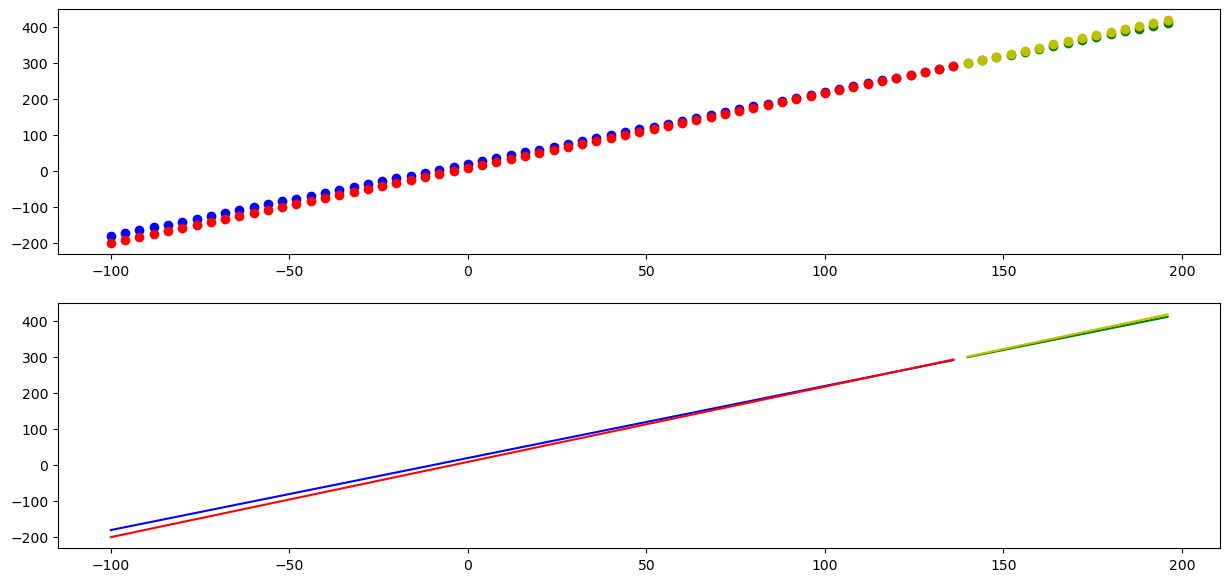

In [99]:
fig,(ax1,ax2) = plt.subplots(nrows=2, figsize=(15,7))

ax2.plot(xtrain,ytrain,c="b")
ax1.scatter(xtrain,ytrain,c="b")
ax2.plot(xtest, ytest,c="g")
ax1.scatter(xtest,ytest,c="g")

ax2.plot(xtrain,model.predict(xtrain),c="r")
ax1.scatter(xtrain,model.predict(xtrain),c="r")
ax2.plot(xtest, ypred,c="y")
ax1.scatter(xtest,ypred,c="y")

# How to save a model

models can be saved in 2 formats
* **The save model format**
* **The HDF5 format**

## Method 1

In [101]:
model.save("saving_the_model_for_the_forst_time_in_savemodel_format.keras")

## Method 2

In [103]:
model.save("saving_the_model_for_the_forst_time_in_HDF5_format.h5")

In [105]:
loading_keras_model=tf.keras.models.load_model("saving_the_model_for_the_forst_time_in_savemodel_format.keras")
loading_keras_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

In [106]:
loading_HDF5_model=tf.keras.models.load_model("saving_the_model_for_the_forst_time_in_HDF5_format.h5")
loading_HDF5_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)